In [32]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats


In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Precipitation Analysis

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
('2017-08-23',)


([], <a list of 0 Text xticklabel objects>)

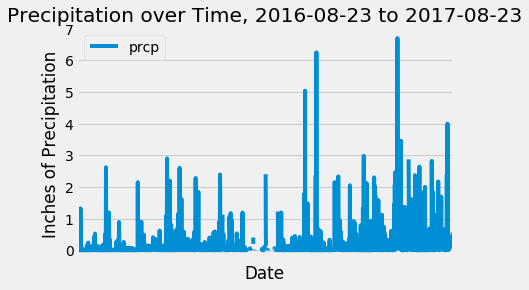

In [116]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])
    
# Calculate the date 1 year ago from the last data point in the database
date_vals = session.query(Measurement.date).order_by(Measurement.date.desc()).all()
last_date=date_vals[0]
print(last_date)

# Perform a query to retrieve the data and precipitation scores
measure_it = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23').all()

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_data = pd.DataFrame(measure_it)
prcp_data.set_index('date')
# Sort the dataframe by date
prcp_data.sort_values(by=['date'])
# Use Pandas Plotting with Matplotlib to plot the data
prcp_data.plot()
plt.title('Precipitation over Time, 2016-08-23 to 2017-08-23')
plt.xlabel('Date')
plt.ylabel('Inches of Precipitation')
plt.xticks([])

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_data.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [12]:
# Design a query to show how many stations are available in this dataset?
inspector = inspect(engine)
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])
    
station_it = session.query(Station.station).all()
#shows 9 unique items in the list, but if this was a larger list then it should be done programatically

station_data = pd.DataFrame(eval('station_it'))
station_data

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


,station
0,USC00519397
1,USC00513117
2,USC00514830
3,USC00517948
4,USC00518838
5,USC00519523
6,USC00519281
7,USC00511918
8,USC00516128


In [13]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station), func.min(Measurement.prcp), func.avg(Measurement.prcp), func.max(Measurement.prcp)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
list(station_activity)

[('USC00519281', 2772, 0.0, 0.2123520923520915, 9.64),
 ('USC00519397', 2724, 0.0, 0.0490204841713224, 4.2),
 ('USC00513117', 2709, 0.0, 0.14192136498516264, 7.65),
 ('USC00519523', 2669, 0.0, 0.11496111975116619, 6.38),
 ('USC00516128', 2612, 0.0, 0.4299879227053122, 8.06),
 ('USC00514830', 2202, 0.0, 0.12105833763551899, 11.53),
 ('USC00511918', 1979, 0.0, 0.04797101449275366, 4.0),
 ('USC00517948', 1372, 0.0, 0.06360175695461204, 2.8),
 ('USC00518838', 511, 0.0, 0.20722222222222236, 6.3)]

In [14]:
# Note: I did precipition data but the temp can be done the same by subsituting 'tobs'; see below
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

station_min_precip = session.query(func.min(Measurement.prcp)).filter_by(station = 'USC00519281').all()
print(f'The min precipitation of USC00519281 is {station_min_precip}')

station_max_precip = session.query(func.max(Measurement.prcp)).filter_by(station = 'USC00519281').all()
print(f'The max precipitation of USC00519281  is {station_max_precip}')

station_avg_precip = session.query(func.avg(Measurement.prcp)).filter_by(station = 'USC00519281').all()
print(f'The average precipitation of USC00519281  is {station_avg_precip}')

station_all_precip = session.query(func.min(Measurement.prcp), func.max(Measurement.prcp), func.avg(Measurement.prcp)).filter_by(station = 'USC00519281').all()
print(f'The answer of USC00519281 is {station_all_precip}')


The min precipitation of USC00519281 is [(0.0,)]
The max precipitation of USC00519281  is [(9.64,)]
The average precipitation of USC00519281  is [(0.2123520923520915,)]
The answer of USC00519281 is [(0.0, 9.64, 0.2123520923520915)]


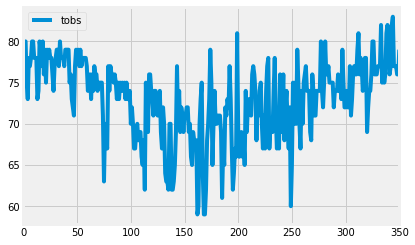

In [15]:
# Not required
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_tobs = session.query(Measurement.date, Measurement.tobs).filter_by(station = 'USC00519281').filter(Measurement.date > '2016-08-23').all()

station_tobs_data = pd.DataFrame(station_tobs)
station_tobs_data.set_index('date')
# Sort the dataframe by date
station_tobs_data.sort_values(by=['date'])
# Use Pandas Plotting with Matplotlib to plot the data
station_tobs_data.plot()

In [16]:
# Design a query to retrieve the last 12 months of temperature observation data (tobs).
# Filter by the station with the highest number of observations.
# Plot the results as a histogram with bins=12.
station_12max_tobs=station_tobs_data['tobs'].max()
station_12min_tobs=station_tobs_data['tobs'].min()
print(f'Max: {station_12max_tobs}')
print(f'Min: {station_12min_tobs}')


Max: 83.0
Min: 59.0


Text(0, 0.5, 'Frequency (# of Occurances)')

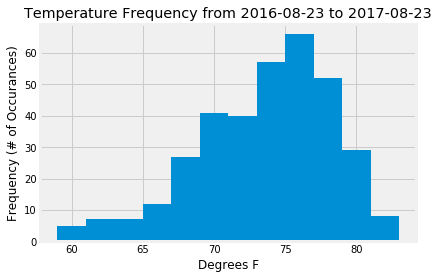

In [17]:
station_tobs_data['tobs'].hist(bins = 12, range=[station_12min_tobs, station_12max_tobs])
plt.title('Temperature Frequency from 2016-08-23 to 2017-08-23')
plt.xlabel('Degrees F')
plt.ylabel('Frequency (# of Occurances)')

## Climate App
### See app.py

## Temperature Analysis I

In [18]:
# Hawaii is reputed to enjoy mild weather all year. Is there a meaningful difference between the temperature in, 
# for example, June and December?
# Identify the average temperature in June and December at all stations across all available years in the dataset. 
# Use the t-test to determine whether the difference in the means, if any, is statistically significant. 

In [19]:
# Will use the independent t-test since this is not the same group and different group size


In [60]:
from scipy import stats

In [58]:
j_temps = session.query(Measurement.date, Measurement.tobs)
ju_temps = pd.DataFrame(j_temps)
ju_temps['date2']= pd.to_datetime(ju_temps['date'])
jun_temps = ju_temps[ju_temps['date2'].dt.month == 6]
june_temps = list(jun_temps['tobs'])
len(june_temps)


1700

In [59]:
dec_temps = ju_temps[ju_temps['date2'].dt.month == 12]
december_temps = list(dec_temps['tobs'])
len(december_temps)

1517

In [62]:
stats.ttest_ind(june_temps,december_temps)

Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

## Temperature Analysis II

In [20]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temp(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temp('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [21]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temp('2016-08-23', '2016-08-28'))

[(71.0, 78.12820512820512, 84.0)]


Text(0.5, 1.0, 'Trip Avg Temperature')

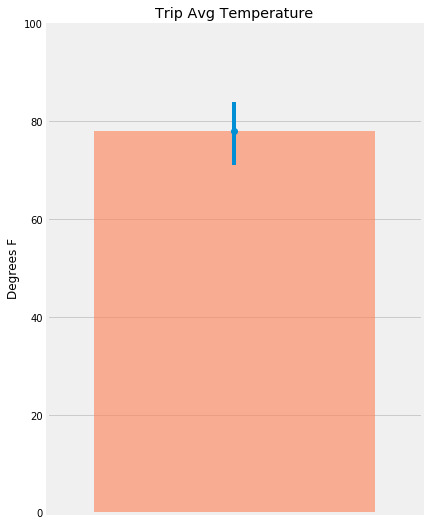

In [22]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax = plt.subplots(figsize=(6,9))
ax.bar(x=1, height=78.128, width=0.3, color=(1, 0.5, 0.33, 0.6))
ax.errorbar(x=1, y=78.128, yerr=[[7.128], [5.872]], fmt='o')
ax.set_xlim(0.8,1.2)
ax.set_ylim(0,100)
plt.xticks([])
plt.ylabel('Degrees F')
plt.title('Trip Avg Temperature')

In [23]:
# Plotted the results from the previous query as a bar chart. 
# Used the average temperature for the y value
# Used the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


## Optional - Daily Rainfall Average

In [24]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# Without Join; see below for with Join
measure_rain = session.query(Measurement.station, func.sum(Measurement.prcp)).filter(Measurement.date > '2016-08-23').filter(Measurement.date < '2016-08-28').group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
measure_rain



[('USC00513117', 2.44),
 ('USC00519281', 2.34),
 ('USC00514830', 2.32),
 ('USC00516128', 1.56),
 ('USC00519523', 1.43),
 ('USC00519397', 0.16),
 ('USC00517948', 0.04)]

In [25]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
# With Join; see above for without Join
measure_rain2 = session.query(Measurement.station, Station.name, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation).filter(Measurement.date > '2016-08-23').filter(Measurement.date < '2016-08-28').filter(Measurement.station == Station.station).group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()
print(measure_rain2)



[('USC00513117', 'KANEOHE 838.1, HI US', 2.44, 21.4234, -157.8015, 14.6), ('USC00519281', 'WAIHEE 837.5, HI US', 2.34, 21.45167, -157.84888999999998, 32.9), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 2.32, 21.5213, -157.8374, 7.0), ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 1.56, 21.3331, -157.8025, 152.4), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 1.43, 21.33556, -157.71139, 19.5), ('USC00519397', 'WAIKIKI 717.2, HI US', 0.16, 21.2716, -157.8168, 3.0), ('USC00517948', 'PEARL CITY, HI US', 0.04, 21.3934, -157.9751, 11.9)]


## Additional Challenge Assignment

In [26]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [106]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start = '2016-08-24'
end = '2016-08-27'
# Use the start and end date to create a range of dates
date_range = pd.date_range(start, end)
# Stip off the year and save a list of %m-%d strings
m_d_dates = date_range.strftime('%m-%d')
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = [daily_normals(x)[0] for x in m_d_dates]
    
normals

[(70.0, 75.96153846153847, 84.0),
 (69.0, 76.96078431372548, 82.0),
 (71.0, 76.56862745098039, 84.0),
 (68.0, 76.28301886792453, 84.0)]

In [108]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(normals, columns=['min', 'avg', 'max'], index=date_range)
df

,min,avg,max
2016-08-24,70.0,75.961538,84.0
2016-08-25,69.0,76.960784,82.0
2016-08-26,71.0,76.568627,84.0
2016-08-27,68.0,76.283019,84.0


(60, 90)

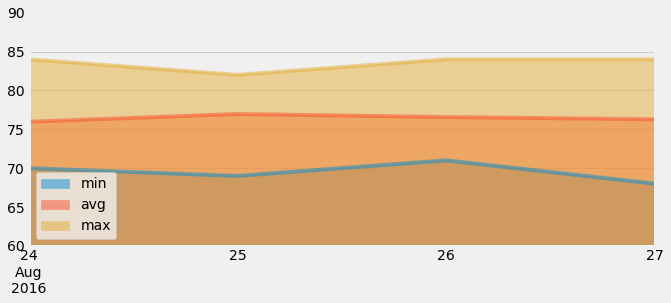

In [114]:
# Plot the daily normals as an area plot with `stacked=False`
ax = df.plot.area(stacked=False, figsize=(10,4))
ax.set_ylim(60, 90)